MLT TA Activity
---
---
---
In an effort to optimize workforce management and foster a more inclusive and productive
work environment, the organization., is embarking on a data-driven project focused on
employee segmentation. The project aims to categorize our employees into distinct groups
based on the attributes of gender, basic pay, and total deduction from employee salaries.
This segmentation will provide valuable insights for the Human Resources (HR)
department, allowing us to tailor strategies and policies that cater to the specific needs and
concerns of different employee groups.
The primary objective of this project is to segment our employees into meaningful clusters
based on their gender, basic pay, and total deduction attributes.


Importing Required libraries

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans

Load Dataset


## Data Set Details

- **employee_id** → Unique identification for each employee  
- **gender** → Male / Female  

---

### Salary Components

- **pay_withBonus** = basic_pay + Bonus  
- **Bonus** = hra + da + travelling_allowance  

where:  
- **hra** → Housing Rent Allowance  
- **da** → Dearness Allowance  

---

### Deductions

**Total Deduction** includes:  
- Income Tax  
- Profession Tax (**pt**)  
- Group Insurance Scheme (**gis**)  
- General Provident Fund (**gpf**)  
- Festive Allowance  
- Other charges  

---

### Final Calculation

**Net_pay** = pay_withBonus - total_deduction


In [21]:
df = pd.read_excel('/content/Employee_Earning_Data.xlsx')

In [22]:
df.head()

,employee_id,gender,basic_pay,pay_withBonus,festive_allowance,total2,total_gov_deduction,netpay,total_nogov_deduction,total_deduction,total_netpay
0,1,0,52000,76485,1250,75235,5561,69674,3200,10011,66474
1,2,1,60400,88833,1250,87583,5561,82022,5000,11811,77022
2,3,1,62200,91479,1250,90229,10561,79668,5200,17011,74468
3,4,1,55200,81189,1250,79939,10561,69378,7660,19471,61718
4,5,0,65900,96918,1250,95668,20681,74987,7200,29131,67787


Statistical Information about Data


In [23]:
df.describe()

,employee_id,gender,basic_pay,pay_withBonus,festive_allowance,total2,total_gov_deduction,netpay,total_nogov_deduction,total_deduction,total_netpay
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000
mean,59.500000,0.457627,55645.762712,83055.881356,1218.220339,81837.661017,12707.584746,69130.076271,6806.016949,20731.822034,62324.059322
std,34.207699,0.500326,8665.854440,10923.955013,345.215482,10980.001640,5535.335015,10395.490435,7232.727009,8454.180837,10306.018111
min,1.000000,0.000000,31000.000000,51605.000000,0.000000,50355.000000,561.000000,39526.000000,0.000000,4811.000000,32783.000000
25%,30.250000,0.000000,52000.000000,76485.000000,1250.000000,75235.000000,9061.000000,62188.000000,2200.000000,14857.000000,54607.500000
50%,59.500000,0.000000,55200.000000,81189.000000,1250.000000,79939.000000,10561.000000,69793.500000,5200.000000,18062.000000,64061.500000
75%,88.750000,1.000000,62200.000000,91479.000000,1250.000000,90229.000000,15561.000000,75991.250000,7700.000000,26611.000000,68794.750000
max,118.000000,1.000000,69900.000000,102798.000000,3750.000000,101548.000000,30681.000000,89254.000000,42950.000000,51761.000000,84254.000000


In [24]:
#datatype Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   employee_id            118 non-null    int64
 1   gender                 118 non-null    int64
 2   basic_pay              118 non-null    int64
 3   pay_withBonus          118 non-null    int64
 4   festive_allowance      118 non-null    int64
 5   total2                 118 non-null    int64
 6   total_gov_deduction    118 non-null    int64
 7   netpay                 118 non-null    int64
 8   total_nogov_deduction  118 non-null    int64
 9   total_deduction        118 non-null    int64
 10  total_netpay           118 non-null    int64
dtypes: int64(11)
memory usage: 10.3 KB


**Exploratory Data Analysis**
---

---



<Axes: xlabel='gender', ylabel='count'>

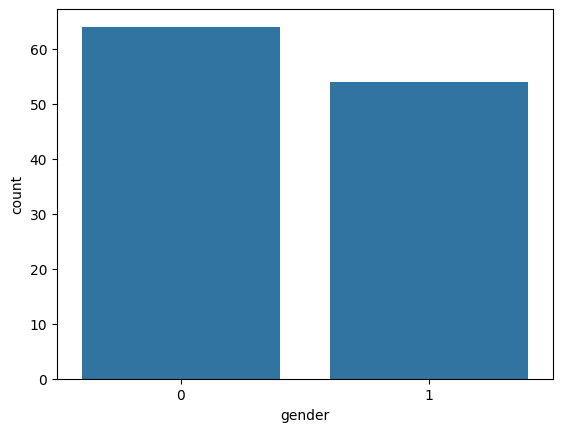

In [25]:
# sns.countplot(df['gender'])
sns.countplot(x='gender', data=df)

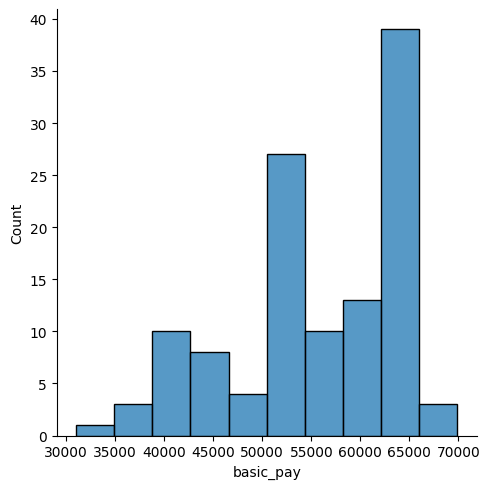

In [26]:
sns.displot(x='basic_pay', data=df)

<Axes: xlabel='basic_pay', ylabel='Density'>

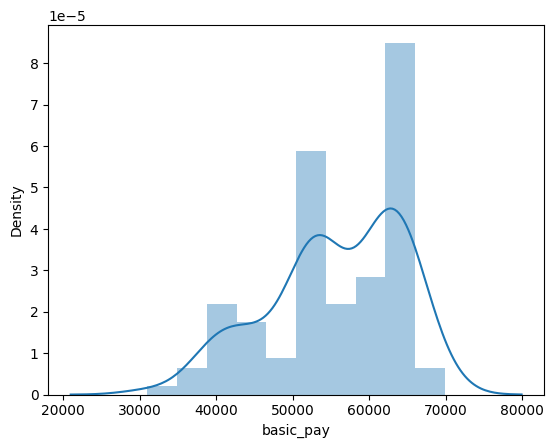

In [27]:
sns.distplot(df['basic_pay'])

<Axes: xlabel='total_deduction', ylabel='Density'>

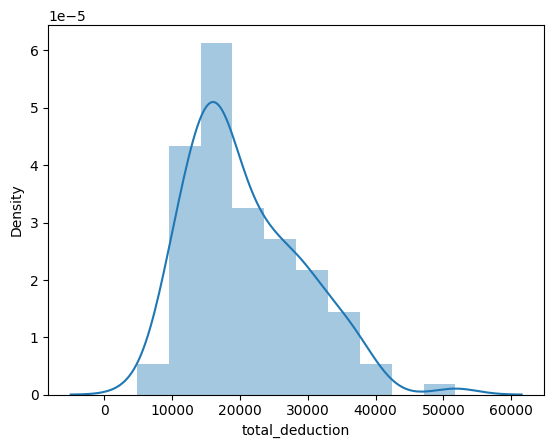

In [28]:
sns.distplot(df['total_deduction'])

Clustering
-----------------------------------

---





Converting
    Male   - 1
    Female - 0

In [29]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Apply label encoding to your 'gender' column
df['gender'] = label_encoder.fit_transform(df['gender'])

In [30]:
df.head()


,employee_id,gender,basic_pay,pay_withBonus,festive_allowance,total2,total_gov_deduction,netpay,total_nogov_deduction,total_deduction,total_netpay
0,1,0,52000,76485,1250,75235,5561,69674,3200,10011,66474
1,2,1,60400,88833,1250,87583,5561,82022,5000,11811,77022
2,3,1,62200,91479,1250,90229,10561,79668,5200,17011,74468
3,4,1,55200,81189,1250,79939,10561,69378,7660,19471,61718
4,5,0,65900,96918,1250,95668,20681,74987,7200,29131,67787


clustering based on three features: gender, Basic pay and total deduction

In [31]:
data = df[['gender','basic_pay', 'total_deduction']]
data.head()

,gender,basic_pay,total_deduction
0,0,52000,10011
1,1,60400,11811
2,1,62200,17011
3,1,55200,19471
4,0,65900,29131


In [32]:
#elbow method to find k
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(data)
  wcss.append(kmeans.inertia_)

Plotting the elbow method

---



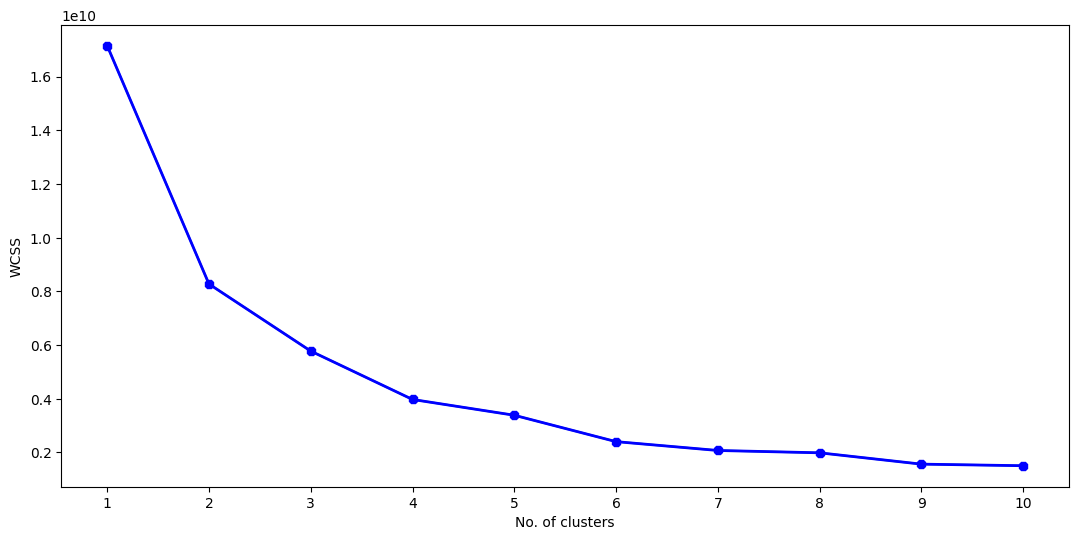

In [33]:
plt.figure(figsize = (13, 6))
plt.plot(range(1, 11), wcss)
plt.plot(range(1,11), wcss, linewidth = 2, color = 'blue', marker = '8')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1,11,1))
plt.show()

In [34]:
km = KMeans(n_clusters = 5)
km.fit(data)
y = km.predict(data)
data['Label'] = y
data.head()

,gender,basic_pay,total_deduction,Label
0,0,52000,10011,2
1,1,60400,11811,3
2,1,62200,17011,3
3,1,55200,19471,2
4,0,65900,29131,1


3D Scatter Plot
---
---

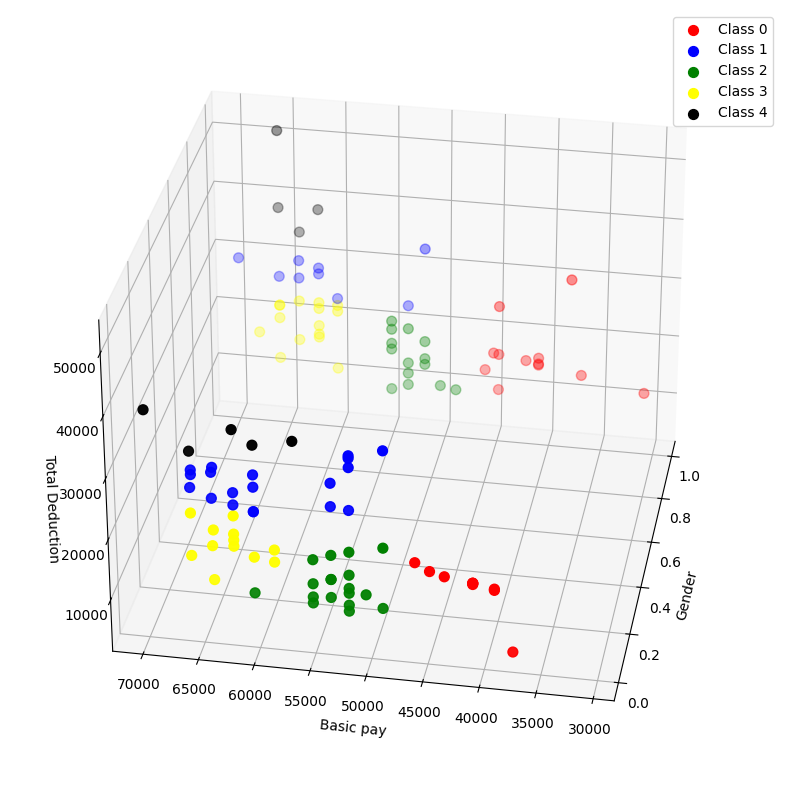

In [35]:
fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(data['gender'][data['Label']==0], data['basic_pay'][data['Label']==0], data['total_deduction'][data['Label']==0], c='red', label = 'Class 0', s=50)
ax.scatter(data['gender'][data['Label']==1], data['basic_pay'][data['Label']==1], data['total_deduction'][data['Label']==1], c='blue', label = 'Class 1', s=50)
ax.scatter(data['gender'][data['Label']==2], data['basic_pay'][data['Label']==2], data['total_deduction'][data['Label']==2], c='green', label = 'Class 2',s=50)
ax.scatter(data['gender'][data['Label']==3], data['basic_pay'][data['Label']==3], data['total_deduction'][data['Label']==3], c='yellow', label = 'Class 3', s=50)
ax.scatter(data['gender'][data['Label']==4], data['basic_pay'][data['Label']==4], data['total_deduction'][data['Label']==4], c='black', label = 'Class 4', s=50)
# ax.scatter(data['gender'][data['Label']==5], data['basic_pay'][data['Label']==5], data['total_deduction'][data['Label']==5], c='brown', label = 'Class 5', s=50)

ax.view_init(30, 190)
ax.set_xlabel('Gender')
ax.set_ylabel('Basic pay')
ax.set_zlabel('Total Deduction')
ax.legend()
plt.show()

Displaying No. of employees belonging to each class

In [36]:
class_counts = data['Label'].value_counts()
print(class_counts)

Label
2    32
1    28
3    27
0    22
4     9
Name: count, dtype: int64


In [37]:
print(data['Label'])

0      2
1      3
2      3
3      2
4      1
      ..
113    2
114    2
115    2
116    3
117    0
Name: Label, Length: 118, dtype: int32


## Clustering Evaluation Metrics

In [38]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score
silhouette_avg = silhouette_score(data[['gender', 'basic_pay', 'total_deduction']], data['Label'])

print(f"The silhouette score for the clustering is: {silhouette_avg}")

The silhouette score for the clustering is: 0.39295899171926163
